# Pluralsight Data Science Take Home Challenge


## THE CHALLENGE: Zeta Disease Prediction

### INTRODUCTION

Mars Mission Control needs a good data-driven system for predicting Zeta Disease infection on the International Mars Colony.
Use the `_zeta-disease_training-data_` dataset to build a model that can predict who will be infected by Zeta Disease.
Apply your model to the `_zeta-disease_prediction-data_` dataset to predict who will be infected by Zeta Disease.


### DATASET

The dataset includes 9 columns with information on 800 people.
1.	age : in years
2.	weight : body weight in pounds (lbs)
3.	bmi : Body Mass Index (weight in kg/(height in m)2)
4.	blood_pressure : resting blood pressure (mm Hg)
5.	insulin_test : inuslin test value
6.	liver_stress_test : liver_stress_test value
7.	cardio_stress_test : cardio_stress_test value
8.	years_smoking : number of years of smoking
9.	zeta_disease :
              1 = yes;
              0 = no


### LOAD LIBRARIES AND PACKAGES

Load libraries and packages below:

In [1]:
import pandas as pd
import numpy as np
import sklearn

from scipy import stats as st

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import binarize
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

import matplotlib.pyplot as plt
import seaborn as sns

### LOAD DATA

In [2]:
# load training dataset provided
data = pd.read_csv("2021_zeta-disease_training-data_take-home-challenge.csv")
data.head()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
0,54,189,27.1,80,0,1.5038,0,10,0
1,23,150,38.5,68,71,0.3868,55,2,0
2,47,186,29.9,90,0,0.2728,0,7,0
3,18,150,30.8,70,1033,0.6598,56,0,0
4,24,160,32.4,74,125,0.7608,59,2,0


## Data Exploration

In [3]:
# data summary statistics
data.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,30.985000,172.407500,32.201625,69.565000,85.887500,0.544496,43.121250,4.051250,0.348750
std,13.824025,31.942438,8.549155,19.874784,126.333656,0.348711,30.409949,4.176173,0.476873
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.000000
25%,21.000000,149.000000,27.300000,62.000000,0.000000,0.307800,0.000000,1.000000,0.000000
50%,26.000000,167.000000,32.050000,72.000000,45.000000,0.445300,53.000000,3.000000,0.000000
75%,38.000000,192.000000,36.525000,80.000000,130.000000,0.699800,62.000000,6.000000,1.000000
max,109.000000,308.000000,86.100000,157.000000,1077.000000,3.481300,214.000000,40.000000,1.000000


In [4]:
# split data into zeta = 1 and zeta = 0 to compare people with zeta disease and those without
data_zeta_yes = data[data['zeta_disease'] == 1]
data_zeta_no = data[data['zeta_disease'] == 0]

# data summary for zeta infected observations
data_zeta_yes.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.000000,279.0
mean,34.627240,192.960573,35.375627,70.806452,107.713262,0.632472,44.620072,5.164875,1.0
std,12.312951,30.167194,8.195067,21.124464,142.679082,0.414967,34.624280,4.692109,0.0
min,18.000000,128.000000,0.000000,0.000000,0.000000,0.150800,0.000000,0.000000,1.0
25%,25.000000,169.000000,30.850000,66.000000,0.000000,0.326300,0.000000,2.000000,1.0
50%,33.000000,192.000000,34.200000,74.000000,48.000000,0.517800,57.000000,4.000000,1.0
75%,42.000000,217.000000,38.500000,82.000000,175.000000,0.804300,66.000000,8.000000,1.0
max,99.000000,295.000000,83.700000,114.000000,846.000000,3.481300,214.000000,40.000000,1.0


In [5]:
# data summary for zeta uninfected observations
data_zeta_no.describe()

,age,weight,bmi,blood_pressure,insulin_test,liver_stress_test,cardio_stress_test,years_smoking,zeta_disease
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.0
mean,29.034549,161.401152,30.501919,68.900192,74.199616,0.497383,42.318618,3.454894,0.0
std,14.200581,27.077778,8.252181,19.159995,115.098463,0.297332,27.895654,3.742477,0.0
min,18.000000,94.000000,0.000000,0.000000,0.000000,0.140800,0.000000,0.000000,0.0
25%,20.000000,143.000000,25.400000,62.000000,0.000000,0.293800,0.000000,1.000000,0.0
50%,24.000000,157.000000,30.100000,70.000000,45.000000,0.403800,52.000000,2.000000,0.0
75%,34.000000,175.000000,35.300000,78.000000,106.000000,0.645800,61.000000,5.000000,0.0
max,109.000000,308.000000,86.100000,157.000000,1077.000000,2.391800,186.000000,38.000000,0.0


In [6]:
# recode zeta_disease column into categorical data for visualization
categorical_data = data.copy()
categorical_data['zeta'] = data['zeta_disease'].apply(lambda x: 'yes' if x==1 else 'no')
categorical_data.drop('zeta_disease',axis=1)

# check what percentage of the training set describes those who are infected by Zeta (zeta_disease = 1)
categorical_data['zeta'].value_counts()

no     521
yes    279
Name: zeta, dtype: int64

Out of 800 observations, 279 have the Zeta disease. The other 521 observations do not.

In [7]:
# make a list of features to be used for data visualization
feature_list = list(categorical_data.columns)

# remove the target variables "zeta" and "zeta_disease" because those are not features
feature_list.remove('zeta')
feature_list.remove('zeta_disease')
feature_list

['age',
 'weight',
 'bmi',
 'blood_pressure',
 'insulin_test',
 'liver_stress_test',
 'cardio_stress_test',
 'years_smoking']

C:\Users\betty\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\betty\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\betty\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\betty\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\betty\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 24.8% of the points c

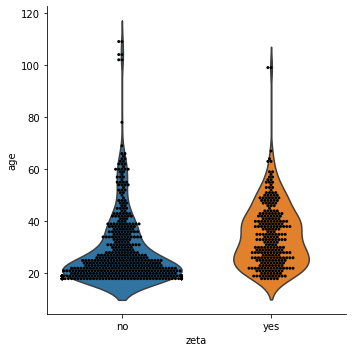

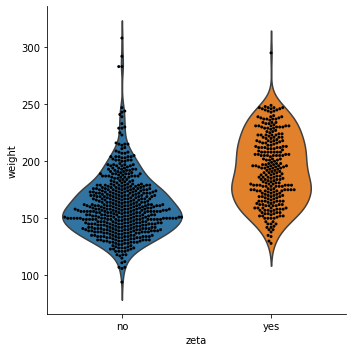

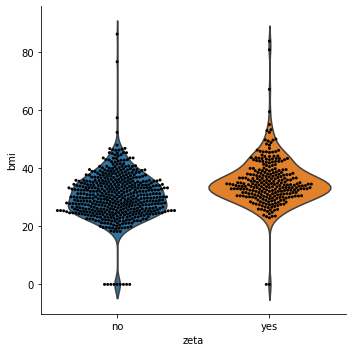

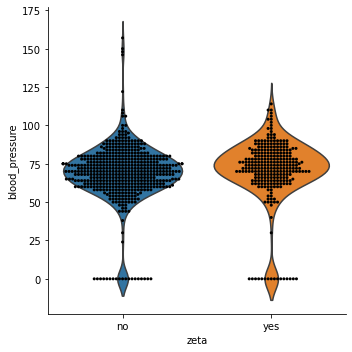

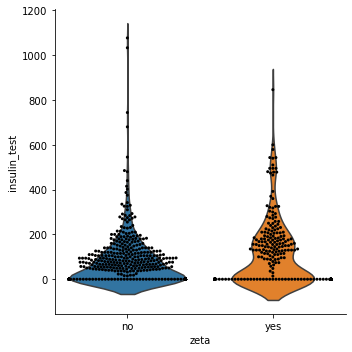

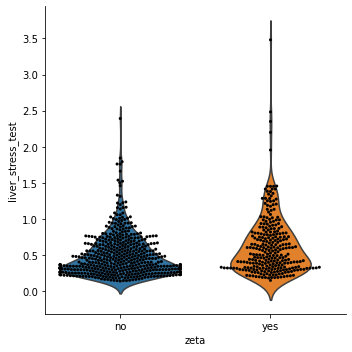

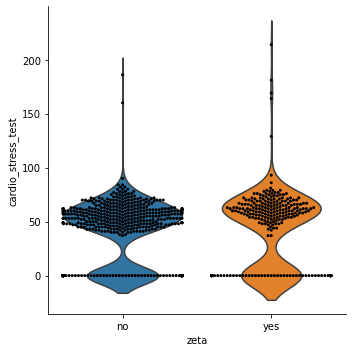

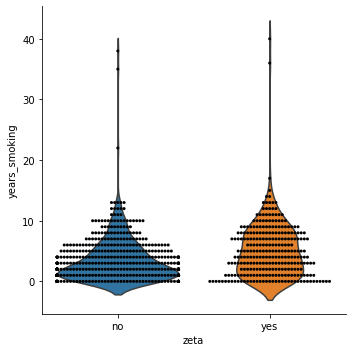

In [8]:
# visualize each feature with respect to Zeta infection status

for feature in feature_list: 
    graph = sns.catplot(x="zeta", y=feature, kind="violin", inner=None, data=categorical_data)
    sns.swarmplot(x="zeta", y=feature, color="k", size=3, data=categorical_data, ax=graph.ax)

Based on the visualizations above, we can see differences in values for each feature when comparing observations that are zeta positive versus observsations that are zeta negative. How are they different? The violin plots show the shape of the distributions, for example, where the median is relative to the other population. The t-tests below will show if the differences are statistically significant.

In [9]:
# check if the data is balanced using a 2-sample t-test

# create a pandas dataframe for storing the t-test results
t_test_results = pd.DataFrame(columns = ['Feature','t-stat','p-value'])

# run t-test for each feature
for feature in feature_list:
    a = categorical_data.loc[categorical_data['zeta']== 'yes', feature].to_numpy()
    b = categorical_data.loc[categorical_data['zeta']== 'no', feature].to_numpy()
    result = st.ttest_ind(a=a, b=b, equal_var=True)
    
    t_test_results = t_test_results.append({'Feature': feature, 
                                             't-stat': result.statistic, 
                                             'p-value': result.pvalue}, 
                                            ignore_index = True
                                           )

In [10]:
# print t-test results in an easy-to-read table, label them significant if the p-value is less than 0.05
t_test_results['Significance'] = t_test_results['p-value'].apply(
    lambda x: 'Significant' if x < 0.05 else 'Not significant')
t_test_results

,Feature,t-stat,p-value,Significance
0,age,5.554268,3.798653e-08,Significant
1,weight,15.089384,1.903530e-45,Significant
2,bmi,7.980181,5.073899e-15,Significant
3,blood_pressure,1.293417,1.962413e-01,Not significant
4,insulin_test,3.602548,3.346249e-04,Significant
5,liver_stress_test,5.310031,1.422194e-07,Significant
6,cardio_stress_test,1.020172,3.079559e-01,Not significant
7,years_smoking,5.624160,2.578961e-08,Significant


The results of these t-tests show that all features are significant except for blood pressure and cardio stress test. The difference in means between zeta positive and zeta negative people for the other features--age, weight, bmi, insulin test, liver stress test, and years of smoking--are significant. This might be useful later for feature selection. Keep in mind that these t-tests only look at the marginal association and do not account for the joint distribution (e.g., having high weight is likely correlated with high bmi).

## Data Processing for Modeling

Now we will do some data processing that is necessary for running machine learning models, which we will use to generate zeta predictions for the 20 out-of-sample cases.

In [11]:
# extract the target variable zeta_disease
# store feature matrix in "x" and target vector in "y"
x = data.drop('zeta_disease',axis=1)
y = data[['zeta_disease']]

# store training data as numpy arrays
X = x.to_numpy()
y = y.to_numpy().ravel()

In [12]:
# load prediction data
predict_data = pd.read_csv("2021_zeta-disease_prediction-data_take-home-challenge.csv")

# drop empty column "zeta_disease"
predict_data = predict_data.drop('zeta_disease',axis=1)

# store prediction data as numpy array
predict_X = predict_data.to_numpy()

## Model 1: K-Nearest Neighbors
K-Nearest Neigbors (KNN) assumes observations that are close
 to each other (i.e., similar feature values) would have similar classification values (i.e., either zeta = 0 or zeta = 1). The k refers to the number of neighbors (i.e., k neighbors) considered by the algorithm.

In [13]:
# define the parameter values to be searched, say 1 to 30
# include other hyperparameters, such as weights
k_range = list(range(1,31))
weight_options = ['uniform', 'distance']

# create a parameter grid
knn_param_grid = dict(n_neighbors=k_range, weights=weight_options)

# instanstiate the grid for hyperperameter tuning
knn = KNeighborsClassifier()
# (we will use accuracy for now, but will consider other classification metrics later)
knn_grid = GridSearchCV(knn, knn_param_grid, cv=10, scoring='accuracy')

# fit the grid with zeta data
knn_grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [14]:
# view the results in a pandas dataframe for sanity check
pd.DataFrame(knn_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.69750,0.043946,"{'n_neighbors': 1, 'weights': 'uniform'}"
1,0.69750,0.043946,"{'n_neighbors': 1, 'weights': 'distance'}"
2,0.72375,0.034664,"{'n_neighbors': 2, 'weights': 'uniform'}"
3,0.69750,0.043946,"{'n_neighbors': 2, 'weights': 'distance'}"
4,0.71500,0.052082,"{'n_neighbors': 3, 'weights': 'uniform'}"
5,0.71250,0.052738,"{'n_neighbors': 3, 'weights': 'distance'}"
6,0.72500,0.043301,"{'n_neighbors': 4, 'weights': 'uniform'}"
7,0.72250,0.057771,"{'n_neighbors': 4, 'weights': 'distance'}"
8,0.72375,0.053165,"{'n_neighbors': 5, 'weights': 'uniform'}"
9,0.72625,0.052276,"{'n_neighbors': 5, 'weights': 'distance'}"


In [15]:
# get the parameters with the best score
print(knn_grid.best_score_)
print(knn_grid.best_params_)

0.76375
{'n_neighbors': 18, 'weights': 'distance'}


Now that we have found the best knn parameters, we can use these parameters to generate predictions for the 20 cases.

In [16]:
# plug in optimal parameters
knn = KNeighborsClassifier(**knn_grid.best_params_)

# fit the knn model again on all training data
knn.fit(X, y)

# make prediction on out of sample data
y_pred_knn = knn.predict(predict_X)

print(y_pred_knn)

[0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1]


## Model 2: Logistic Regression
Logistic regression uses a linear logistic function to model a binary dependent variable (i.e., zeta = 1 or zeta = 0).

In [17]:
# define the parameter values to be searched
solver = ['liblinear']
penalty = ['l1', 'l2']
C = [1000, 100, 10, 1.0, 0.1, 0.01]

# create a parameter grid
logreg_param_grid = dict(solver=solver, penalty=penalty, C=C)

# instanstiate the grid
logreg = LogisticRegression()
# (we will use accuracy for now, but will consider other classification metrics later)
logreg_grid = GridSearchCV(estimator=logreg, param_grid=logreg_param_grid, cv=10, scoring='accuracy')

# fit the grid with zeta data
logreg_grid.fit(X, y)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1000, 100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [18]:
# view the results in a pandas dataframe for sanity check
pd.DataFrame(logreg_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.77000,0.041908,"{'C': 1000, 'penalty': 'l1', 'solver': 'liblin..."
1,0.77000,0.041908,"{'C': 1000, 'penalty': 'l2', 'solver': 'liblin..."
2,0.77000,0.041908,"{'C': 100, 'penalty': 'l1', 'solver': 'libline..."
3,0.76875,0.041552,"{'C': 100, 'penalty': 'l2', 'solver': 'libline..."
4,0.77000,0.041908,"{'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}"
5,0.76750,0.043373,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}"
6,0.76750,0.043373,"{'C': 1.0, 'penalty': 'l1', 'solver': 'libline..."
7,0.76375,0.041250,"{'C': 1.0, 'penalty': 'l2', 'solver': 'libline..."
8,0.75125,0.046587,"{'C': 0.1, 'penalty': 'l1', 'solver': 'libline..."
9,0.70250,0.042131,"{'C': 0.1, 'penalty': 'l2', 'solver': 'libline..."


In [19]:
# get the parameters with the best score
print(logreg_grid.best_score_)
print(logreg_grid.best_params_)

0.7700000000000001
{'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}


Now that we have found the best logistic regression parameters, we can use these parameters to generate predictions for the 20 cases.

In [20]:
# plug in optimal parameters
logreg = LogisticRegression(**logreg_grid.best_params_)

# fit the logreg model again on all training data
logreg.fit(X, y)

# make prediction on out of sample data
y_pred_logreg = logreg.predict(predict_X)

print(y_pred_logreg)

[0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1]


## Model 3: AdaBoost
Adaptive Boosting (AdaBoost) is a boosting method that combines many estimators trained based on adaptive re-weighting of the data.

In [21]:
## note: this cell will take a little longer to run ##

# define the parameter values to be searched
n_estimators = [10, 50, 250, 1000]
learning_rate = [0.01, 0.1, 1]

# create a parameter grid
adaboost_param_grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)

# instanstiate the grid
adaboost = AdaBoostClassifier()
# (we will use accuracy for now, but will consider other classification metrics later)
adaboost_grid = GridSearchCV(estimator=adaboost, param_grid=adaboost_param_grid, cv=10, scoring='accuracy')

# fit the grid with zeta data
adaboost_grid.fit(X, y)

GridSearchCV(cv=10, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [10, 50, 250, 1000]},
             scoring='accuracy')

In [22]:
# view the results in a pandas dataframe for sanity check
pd.DataFrame(adaboost_grid.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.72625,0.037687,"{'learning_rate': 0.01, 'n_estimators': 10}"
1,0.73625,0.033284,"{'learning_rate': 0.01, 'n_estimators': 50}"
2,0.75750,0.055958,"{'learning_rate': 0.01, 'n_estimators': 250}"
3,0.77375,0.048878,"{'learning_rate': 0.01, 'n_estimators': 1000}"
4,0.74375,0.036336,"{'learning_rate': 0.1, 'n_estimators': 10}"
5,0.76625,0.048428,"{'learning_rate': 0.1, 'n_estimators': 50}"
6,0.77000,0.050683,"{'learning_rate': 0.1, 'n_estimators': 250}"
7,0.76375,0.042371,"{'learning_rate': 0.1, 'n_estimators': 1000}"
8,0.77000,0.062550,"{'learning_rate': 1, 'n_estimators': 10}"
9,0.75750,0.046503,"{'learning_rate': 1, 'n_estimators': 50}"


In [23]:
# get the parameters with the best score
print(adaboost_grid.best_score_)
print(adaboost_grid.best_params_)

0.7737499999999999
{'learning_rate': 0.01, 'n_estimators': 1000}


Now that we have found the best AdaBoost parameters, we can use these parameters to generate predictions for the 20 cases.

In [24]:
# plug in optimal parameters
adaboost = AdaBoostClassifier(**adaboost_grid.best_params_)

# fit the adaboost model again on all training data
adaboost.fit(X, y)

# make prediction on out of sample data
y_pred_adaboost = adaboost.predict(predict_X)

print(y_pred_adaboost)

[0 1 0 1 1 0 0 0 1 0 1 1 0 1 1 1 1 1 1 1]


## ROC Curves, Precision and Recall Trade-offs
ROC and precision/recall plots could inform a decision maker in choosing a classification threshold (default is 0.5). Do we want higher precision (the proportion of positive prediction that was actually correct) or higher recall (the proportion of actual positives that was identified correctly)? Would we want to be better at correctly identifying those who have Zeta infection, or better at correctly identifying those who are not infected? The graphs that follow will help answer these questions.

In [25]:
# to graph the ROC, precision and recall curves, we are using a training split method simpler than cross-validation

# split training data such that 1/4 becomes test set and the rest (3/4) are used to train models
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

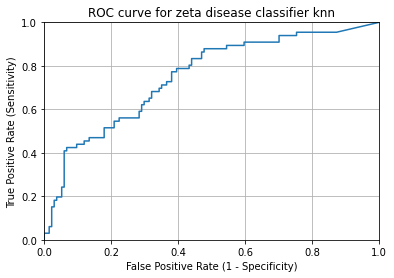

In [26]:
# ROC curve for the knn model
knn = KNeighborsClassifier(**knn_grid.best_params_)
knn.fit(X_train, y_train)
knn_y_score = knn.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, knn_y_score, pos_label=knn.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for zeta disease classifier knn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

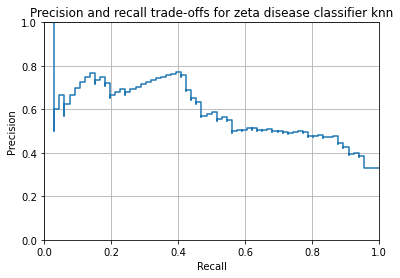

In [27]:
# precision and recall curve for the knn model
prec, recall, threshold = precision_recall_curve(y_test, knn_y_score, pos_label=knn.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision and recall trade-offs for zeta disease classifier knn')
plt.grid(True)

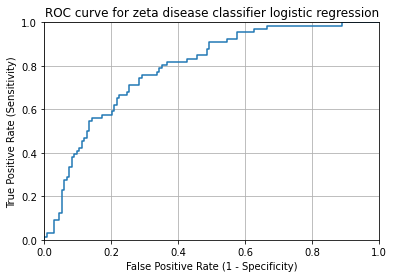

In [28]:
# ROC curve for the logistic regression model
logreg = LogisticRegression(**logreg_grid.best_params_)
logreg.fit(X_train, y_train)
logreg_y_score = logreg.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, logreg_y_score, pos_label=logreg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for zeta disease classifier logistic regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

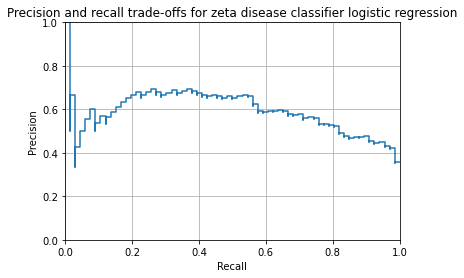

In [29]:
# precision and recall curve for the logistic regression model
prec, recall, threshold = precision_recall_curve(y_test, logreg_y_score, pos_label=logreg.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision and recall trade-offs for zeta disease classifier logistic regression')
plt.grid(True)

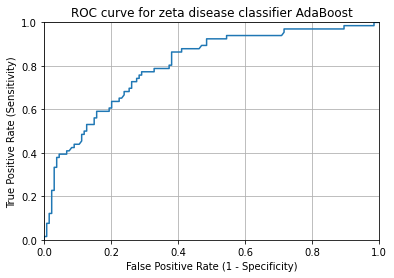

In [30]:
# ROC curve for the AdaBoost model
adaboost = AdaBoostClassifier(**adaboost_grid.best_params_)
adaboost.fit(X_train, y_train)
adaboost_y_score = adaboost.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, adaboost_y_score, pos_label=logreg.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for zeta disease classifier AdaBoost')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

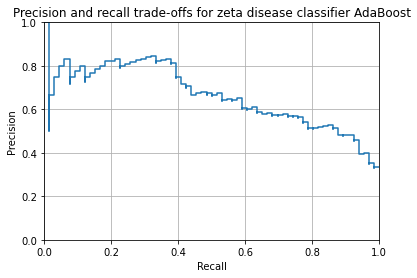

In [31]:
# precision and recall curve for the adaboost model
prec, recall, threshold = precision_recall_curve(y_test, adaboost_y_score, pos_label=adaboost.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Precision and recall trade-offs for zeta disease classifier AdaBoost')
plt.grid(True)

## Probability distribution for binary classification
Let's take a look at the distribution of the probabilities for generating the binary predictions (to see if they were balanced around the 0.5 cut-off threshold).

In [32]:
# probability of the prediction zeta=1 for the knn model
knn_pred_prob = knn.predict_proba(predict_X)[:, 1]
knn_pred_prob

array([0.15464039, 0.47816954, 0.13698473, 0.52412759, 0.35304167,
       0.07207318, 0.11843394, 0.1296441 , 0.35354438, 0.18590278,
       0.60640551, 0.65306684, 0.35172086, 0.74367441, 0.61249728,
       0.74033652, 0.62760283, 0.31364263, 0.70710335, 0.68898643])

Text(0, 0.5, 'Frequency')

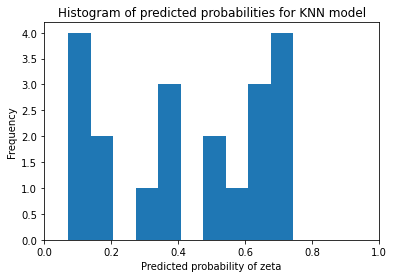

In [33]:
# visualize the probability distribution
%matplotlib inline

plt.hist(knn_pred_prob, bins=10)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities for KNN model')
plt.xlabel('Predicted probability of zeta')
plt.ylabel('Frequency')

In [34]:
# probability of the prediction zeta=1 for the logistic regression model
logreg_pred_prob = logreg.predict_proba(predict_X)[:, 1]
logreg_pred_prob

array([0.36638388, 0.60591231, 0.16171299, 0.79633774, 0.85025133,
       0.31389514, 0.24916179, 0.22761526, 0.71783043, 0.47929907,
       0.9145939 , 0.63237314, 0.42590587, 0.86678828, 0.68187412,
       0.90844885, 0.66315327, 0.95941707, 0.51582102, 0.44729379])

Text(0, 0.5, 'Frequency')

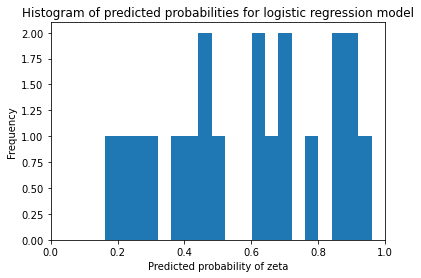

In [35]:
# visualize the probability distribution
%matplotlib inline

plt.hist(logreg_pred_prob, bins=20)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities for logistic regression model')
plt.xlabel('Predicted probability of zeta')
plt.ylabel('Frequency')

In [36]:
# probability of the prediction zeta=1 for the adaboost model
adaboost_pred_prob = adaboost.predict_proba(predict_X)[:, 1]
adaboost_pred_prob

array([0.46095003, 0.49379027, 0.43247978, 0.52735227, 0.49324989,
       0.42478786, 0.42113019, 0.44453059, 0.50497304, 0.44191247,
       0.54861204, 0.5084166 , 0.46071423, 0.51639059, 0.49554925,
       0.5191435 , 0.48702141, 0.51978448, 0.5009273 , 0.50971025])

Text(0, 0.5, 'Frequency')

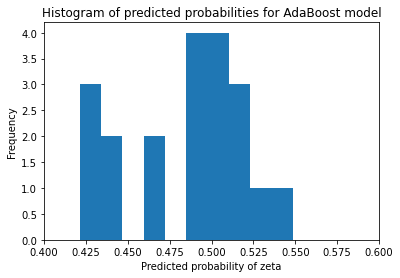

In [37]:
# visualize the probability distribution
%matplotlib inline

plt.hist(adaboost_pred_prob, bins=10)
plt.xlim(0.4, .6)
plt.title('Histogram of predicted probabilities for AdaBoost model')
plt.xlabel('Predicted probability of zeta')
plt.ylabel('Frequency')

The probability histograms do not reveal any threshold that is obviously better than the 0.5 default threshold.

## Final prediction results
Let's compare the prediction results to see in which cases the models agree, and identify the cases that are trickier to preditct (i.e., where the models produce different predictions). We won't worry too much about these cases (because that's overfitting!) but it might inform model selection and how we want to change the classification threshold for different models. To get the final predictions, we will use the majority vote heuristic. If 2 out of the 3 models predict zeta=0, we will go with 0. If 2 out of 3 models predict zeta=1, we will go with 1. The final predictions are as follows:

In [38]:
# put the prediction results in a pandas dataframe

# create an empty dataframe with index starting at 1 denoting cases 1 through 20
predictive_model_results = pd.DataFrame(index=range(1,21))

# add knn zeta predictions
predictive_model_results['KNN'] = y_pred_knn

# add logistic regression zeta predictions
predictive_model_results['LogRegress'] = y_pred_logreg 

# add adaboost zeta predictions
predictive_model_results['AdaBoost'] = y_pred_adaboost

# add new column that indicates convergence or divergence
pred_converge = []
for pred in range(20): 
    if y_pred_knn.tolist()[pred]+y_pred_logreg.tolist()[pred]+y_pred_adaboost.tolist()[pred]==3: 
        pred_converge.append(1)
    elif y_pred_knn.tolist()[pred]+y_pred_logreg.tolist()[pred]+y_pred_adaboost.tolist()[pred]==0: 
        pred_converge.append(0)
    else: 
        pred_converge.append('Disagree')
predictive_model_results['Agree/Disagree'] = pred_converge

# add new column that uses majority vote to generate final predictions
majority_vote = []
for pred in range(20): 
    if y_pred_knn.tolist()[pred]+y_pred_logreg.tolist()[pred]+y_pred_adaboost.tolist()[pred]==3: 
        majority_vote.append(1)
    elif y_pred_knn.tolist()[pred]+y_pred_logreg.tolist()[pred]+y_pred_adaboost.tolist()[pred]==0: 
        majority_vote.append(0)
    elif y_pred_knn.tolist()[pred]+y_pred_logreg.tolist()[pred]+y_pred_adaboost.tolist()[pred]==2: 
        majority_vote.append(1)
    elif y_pred_knn.tolist()[pred]+y_pred_logreg.tolist()[pred]+y_pred_adaboost.tolist()[pred]==1: 
        majority_vote.append(0)
    else: 
        pred_converge.append('out of range')
predictive_model_results['Final predictions'] = majority_vote

predictive_model_results

,KNN,LogRegress,AdaBoost,Agree/Disagree,Final predictions
1,0,0,0,0,0
2,0,1,1,Disagree,1
3,0,0,0,0,0
4,1,1,1,1,1
5,0,1,1,Disagree,1
6,0,0,0,0,0
7,0,0,0,0,0
8,0,0,0,0,0
9,0,1,1,Disagree,1
10,0,1,0,Disagree,0


Authored by Hui-Chen Betty Liu